# Feature-Engineering

In this notebook, we will take the data in `dataset_interim.csv` and do the following:

1. Move the target variable to the leftmost column;
2. Rename columns where necessary; and
3. One-hot-encode categorical variables.

At the end of this notebook, we will run a function that we have defined to create a new `.csv` file that contains our edited dataset.

In [1]:
# Import libraries
import os
import sys

import numpy as np
import pandas as pd

# Modify notebook settings
pd.options.display.max_columns = 150
%matplotlib inline

### Create paths to data file, append `src` directory to sys.path

In [2]:
# Create a variable for the project root directory
proj_root = os.path.join(os.pardir)

# Save path to the interim data file
# "dataset_interim.csv"
interim_data_file = os.path.join(proj_root,
                                "data",
                                "interim",
                                "dataset_interim.csv")

In [3]:
# add the 'src' directory as one where we can import modules
src_dir = os.path.join(proj_root, "src")
sys.path.append(src_dir)

### Read in the interim data

In [4]:
# Read in the interim credit card client default data set.

df_interim = pd.read_csv(interim_data_file,
                         index_col=0)

#df_interim.head()

In [5]:
df_interim.shape

(30000, 36)

### Move the target variable to the leftmost column

In [6]:
# Get the current list of columns names
col_names = list(df_interim.columns)
#col_names

In [7]:
# Identify the target variable column name
target = 'default payment next month'

In [8]:
# Move the target column name to the beginning
# of the list using index, pop, and insert
col_names.insert(0, col_names.pop(col_names.index(target)))
#col_names

In [9]:
# Use the reordered list of columns names 
# and .loc to reorder the columns in df_interim
df_interim = df_interim.loc[:, col_names]
#df_interim.head()

In [10]:
df_interim.shape

(30000, 36)

### Rename columns

We want to rename the columns such that all column names:
1. contain no capital letters;
2. contain no spaces; and
3. are shorter.

#### Replace capital letters with lower-case letters and replace spaces with underscores

In [11]:
# Get the current list of columns names
col_names_current = list(df_interim.columns)
#col_names_current

In [12]:
col_names_new = [s.lower().replace(" ", "_") for s in col_names_current]
#col_names_new

In [13]:
cols_dict = {old: new for (old, new) in zip(col_names_current,
                                            col_names_new)}
#cols_dict

In [14]:
df_interim.rename(columns=cols_dict, inplace=True)
#df_interim.head()

In [15]:
# Get the current list of columns names
col_names_current = list(df_interim.columns)
#col_names_current

#### Rename columns that have long names

In [16]:
# Make a dictionary to rename columns that have long names,
# where the keys are the current names and the 
# values are the new, shorter names.
cols_dict = {'default_payment_next_month': 'y',
             'education': 'edu',
             'ba_over_cl_1': 'bl_ratio_1',
             'ba_over_cl_2': 'bl_ratio_2',
             'ba_over_cl_3': 'bl_ratio_3',
             'ba_over_cl_4': 'bl_ratio_4',
             'ba_over_cl_5': 'bl_ratio_5',
             'ba_over_cl_6': 'bl_ratio_6',
             'ba_less_pa_over_cl_1': 'blpl_ratio_1',
             'ba_less_pa_over_cl_2': 'blpl_ratio_2',
             'ba_less_pa_over_cl_3': 'blpl_ratio_3',
             'ba_less_pa_over_cl_4': 'blpl_ratio_4',
             'ba_less_pa_over_cl_5': 'blpl_ratio_5',
             'ba_less_pa_over_cl_6': 'blpl_ratio_6'}

In [17]:
df_interim.rename(columns=cols_dict, inplace=True)
#df_interim.head()

In [18]:
df_interim.shape

(30000, 36)

### Log transforms

Next, we will engineer some new features by taking the natural log of existing features, where appropriate.

`limit_bal` may be a good candidate, since it has large outliers and can only take on positive values.

In [19]:
df_interim.limit_bal.min()

10000

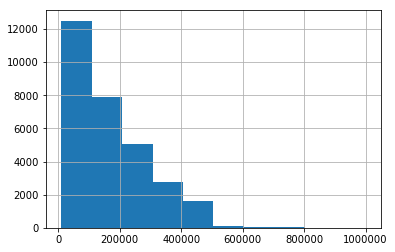

In [20]:
df_interim.limit_bal.hist()

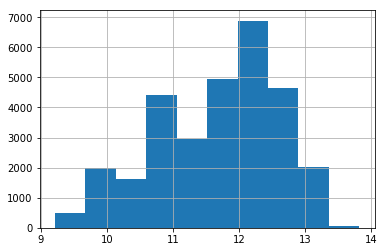

In [21]:
df_interim.limit_bal.apply(np.log).hist()

In [22]:
df_interim['limit_bal_log'] = df_interim.limit_bal.apply(np.log)

`age` may also be a good candidate, since it has few observations for old people and can only take on positive values.

In [23]:
df_interim.age.min()

21

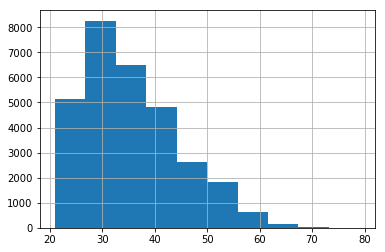

In [24]:
df_interim.age.hist()

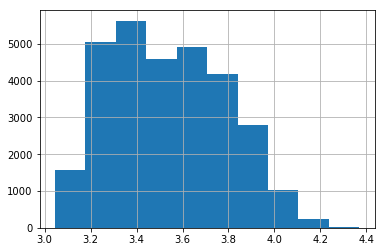

In [25]:
df_interim.age.apply(np.log).hist()

In [26]:
df_interim['age_log'] = df_interim.age.apply(np.log)

There are also several features that have large positive outliers, but that have some negative values and zero values as well.  We will engineer new features from these original features by forcing negative values to zero and taking the `log1p` of non-negative values.

In [27]:
new_log1p_list = ['bill_amt1',
                  'bill_amt2',
                  'bill_amt3',
                  'bill_amt4',
                  'bill_amt5',
                  'bill_amt6',
                  'pay_amt1',
                  'pay_amt2',
                  'pay_amt3',
                  'pay_amt4',
                  'pay_amt5',
                  'pay_amt6']

In [28]:
def new_log1p(x):
    if x < 0:
        output = 0
    else:
        output = np.log1p(x)
    return output

In [29]:
for col in new_log1p_list:
    new_col = col + '_log'
    df_interim[new_col] = df_interim[col].apply(new_log1p)

Drop the original features that were log-transformed.

In [30]:
drop_list = ['limit_bal',
             'age',
             'bill_amt1',
             'bill_amt2',
             'bill_amt3',
             'bill_amt4',
             'bill_amt5',
             'bill_amt6',
             'pay_amt1',
             'pay_amt2',
             'pay_amt3',
             'pay_amt4',
             'pay_amt5',
             'pay_amt6']

In [31]:
df_interim.drop(drop_list,
                axis=1, 
                inplace=True)

In [32]:
df_interim.head()

,y,sex,edu,marriage,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,bl_ratio_1,bl_ratio_2,bl_ratio_3,bl_ratio_4,bl_ratio_5,bl_ratio_6,blpl_ratio_1,blpl_ratio_2,blpl_ratio_3,blpl_ratio_4,blpl_ratio_5,blpl_ratio_6,limit_bal_log,age_log,bill_amt1_log,bill_amt2_log,bill_amt3_log,bill_amt4_log,bill_amt5_log,bill_amt6_log,pay_amt1_log,pay_amt2_log,pay_amt3_log,pay_amt4_log,pay_amt5_log,pay_amt6_log
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,1,2,2,1,2,2,-1,-1,-2,-2,0.195650,0.155100,0.034450,0.000000,0.000000,0.000000,0.195650,0.120650,0.034450,0.000000,0.000000,0.000000,9.903488,3.178054,8.272315,8.040125,6.536692,0.000000,0.000000,0.000000,0.000000,6.536692,0.000000,0.000000,0.000000,0.000000
2,1,2,2,2,-1,2,0,0,0,2,0.022350,0.014375,0.022350,0.027267,0.028792,0.027175,0.022350,0.006042,0.014017,0.018933,0.028792,0.010508,11.695247,3.258097,7.894691,7.453562,7.894691,8.093462,8.147867,8.090096,0.000000,6.908755,6.908755,6.908755,0.000000,7.601402
3,0,2,2,2,0,0,0,0,0,0,0.324878,0.155856,0.150656,0.159233,0.166089,0.172767,0.308011,0.139189,0.139544,0.148122,0.154978,0.117211,11.407565,3.526361,10.283293,9.548811,9.514880,9.570250,9.612400,9.651816,7.325808,7.313887,6.908755,6.908755,6.908755,8.517393
4,0,2,2,1,0,0,0,0,0,0,0.939800,0.964660,0.985820,0.566280,0.579180,0.590940,0.899800,0.924280,0.961820,0.544280,0.557800,0.570940,10.819778,3.610918,10.757711,10.783819,10.805517,10.251147,10.273671,10.293771,7.601402,7.610853,7.090910,7.003974,6.975414,6.908755
5,0,1,2,1,-1,0,-1,0,0,0,0.172340,0.113400,0.716700,0.418800,0.382920,0.382620,0.132340,-0.620220,0.516700,0.238800,0.369140,0.369040,10.819778,4.043051,9.061608,8.643121,10.486708,9.949464,9.859901,9.859118,7.601402,10.510041,9.210440,9.105091,6.536692,6.522093


### One-hot-encode categorical variables

We will one-hot-encode all of the categorical variables, excluding the target variable `y`.

In [33]:
# check the datatypes of each column in the DataFrame
#df_interim.dtypes

In [34]:
# Check which columns are categorical
#df_interim.head()

In [35]:
# Make a list of categorical columns
categorical_vars = ['sex', 'edu', 'marriage', 
                    'pay_1', 'pay_2', 'pay_3', 
                    'pay_4', 'pay_5', 'pay_6']

In [36]:
# Cast values in the categorical columns as type str.
df_interim[categorical_vars] = df_interim[categorical_vars].astype(str)

In [37]:
# Double-check the datatypes of each column in the DataFrame.
# Make sure that values in the categorical columns have been 
# cast as type str.
#df_interim.dtypes

In [38]:
# One-hot-encode the categorical variables
df_interim = pd.get_dummies(df_interim, 
                            columns=categorical_vars, 
                            drop_first=True)
df_interim.head()

,y,bl_ratio_1,bl_ratio_2,bl_ratio_3,bl_ratio_4,bl_ratio_5,bl_ratio_6,blpl_ratio_1,blpl_ratio_2,blpl_ratio_3,blpl_ratio_4,blpl_ratio_5,blpl_ratio_6,limit_bal_log,age_log,bill_amt1_log,bill_amt2_log,bill_amt3_log,bill_amt4_log,bill_amt5_log,bill_amt6_log,pay_amt1_log,pay_amt2_log,pay_amt3_log,pay_amt4_log,pay_amt5_log,pay_amt6_log,sex_2,edu_2,edu_3,edu_4,marriage_1,marriage_2,marriage_3,pay_1_-2,pay_1_0,pay_1_1,pay_1_2,pay_1_3,pay_1_4,pay_1_5,pay_1_6,pay_1_7,pay_1_8,pay_2_-2,pay_2_0,pay_2_1,pay_2_2,pay_2_3,pay_2_4,pay_2_5,pay_2_6,pay_2_7,pay_2_8,pay_3_-2,pay_3_0,pay_3_1,pay_3_2,pay_3_3,pay_3_4,pay_3_5,pay_3_6,pay_3_7,pay_3_8,pay_4_-2,pay_4_0,pay_4_1,pay_4_2,pay_4_3,pay_4_4,pay_4_5,pay_4_6,pay_4_7,pay_4_8,pay_5_-2,pay_5_0,pay_5_2,pay_5_3,pay_5_4,pay_5_5,pay_5_6,pay_5_7,pay_5_8,pay_6_-2,pay_6_0,pay_6_2,pay_6_3,pay_6_4,pay_6_5,pay_6_6,pay_6_7,pay_6_8
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,1,0.195650,0.155100,0.034450,0.000000,0.000000,0.000000,0.195650,0.120650,0.034450,0.000000,0.000000,0.000000,9.903488,3.178054,8.272315,8.040125,6.536692,0.000000,0.000000,0.000000,0.000000,6.536692,0.000000,0.000000,0.000000,0.000000,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,1,0.022350,0.014375,0.022350,0.027267,0.028792,0.027175,0.022350,0.006042,0.014017,0.018933,0.028792,0.010508,11.695247,3.258097,7.894691,7.453562,7.894691,8.093462,8.147867,8.090096,0.000000,6.908755,6.908755,6.908755,0.000000,7.601402,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,0,0.324878,0.155856,0.150656,0.159233,0.166089,0.172767,0.308011,0.139189,0.139544,0.148122,0.154978,0.117211,11.407565,3.526361,10.283293,9.548811,9.514880,9.570250,9.612400,9.651816,7.325808,7.313887,6.908755,6.908755,6.908755,8.517393,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0.939800,0.964660,0.985820,0.566280,0.579180,0.590940,0.899800,0.924280,0.961820,0.544280,0.557800,0.570940,10.819778,3.610918,10.757711,10.783819,10.805517,10.251147,10.273671,10.293771,7.601402,7.610853,7.090910,7.003974,6.975414,6.908755,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
5,0,0.172340,0.113400,0.716700,0.418800,0.382920,0.382620,0.132340,-0.620220,0.516700,0.238800,0.369140,0.369040,10.819778,4.043051,9.061608,8.643121,10.486708,9.949464,9.859901,9.859118,7.601402,10.510041,9.210440,9.105091,6.536692,6.522093,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [39]:
df_interim.shape

(30000, 92)

In [40]:
df_interim.shape

(30000, 92)

### Create `dataset_processed.csv`

In [41]:
new_file_name = 'dataset_processed.csv'
processed_data_dir = os.path.join(proj_root,
                                  "data",
                                  "processed")

new_file_path = os.path.join(processed_data_dir,
                             new_file_name)

df_interim.to_csv(new_file_path)

### Create `dataset_processed.csv` using source code

In [42]:
# import build_features from the source code
import features.engineer_features as ef

In [43]:
# Engineer features
ef.create_processed_dataset(new_file_name='dataset_processed.csv')

Review the `dataset_processed.csv` file to check that the feature engineering worked as expected.

In [44]:
# Save path to the processed data file
# "dataset_processed.csv"
processed_data_file = os.path.join(proj_root,
                                   "data",
                                   "processed",
                                   "dataset_processed.csv")

# Read in the new credit card client default data set.
df_processed = pd.read_csv(processed_data_file, 
                           index_col=0)

df_processed.head()

,y,bl_ratio_1,bl_ratio_2,bl_ratio_3,bl_ratio_4,bl_ratio_5,bl_ratio_6,blpl_ratio_1,blpl_ratio_2,blpl_ratio_3,blpl_ratio_4,blpl_ratio_5,blpl_ratio_6,limit_bal_log,age_log,bill_amt1_log,bill_amt2_log,bill_amt3_log,bill_amt4_log,bill_amt5_log,bill_amt6_log,pay_amt1_log,pay_amt2_log,pay_amt3_log,pay_amt4_log,pay_amt5_log,pay_amt6_log,sex_2,edu_2,edu_3,edu_4,marriage_1,marriage_2,marriage_3,pay_1_-2,pay_1_0,pay_1_1,pay_1_2,pay_1_3,pay_1_4,pay_1_5,pay_1_6,pay_1_7,pay_1_8,pay_2_-2,pay_2_0,pay_2_1,pay_2_2,pay_2_3,pay_2_4,pay_2_5,pay_2_6,pay_2_7,pay_2_8,pay_3_-2,pay_3_0,pay_3_1,pay_3_2,pay_3_3,pay_3_4,pay_3_5,pay_3_6,pay_3_7,pay_3_8,pay_4_-2,pay_4_0,pay_4_1,pay_4_2,pay_4_3,pay_4_4,pay_4_5,pay_4_6,pay_4_7,pay_4_8,pay_5_-2,pay_5_0,pay_5_2,pay_5_3,pay_5_4,pay_5_5,pay_5_6,pay_5_7,pay_5_8,pay_6_-2,pay_6_0,pay_6_2,pay_6_3,pay_6_4,pay_6_5,pay_6_6,pay_6_7,pay_6_8
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,1,0.195650,0.155100,0.034450,0.000000,0.000000,0.000000,0.195650,0.120650,0.034450,0.000000,0.000000,0.000000,9.903488,3.178054,8.272315,8.040125,6.536692,0.000000,0.000000,0.000000,0.000000,6.536692,0.000000,0.000000,0.000000,0.000000,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,1,0.022350,0.014375,0.022350,0.027267,0.028792,0.027175,0.022350,0.006042,0.014017,0.018933,0.028792,0.010508,11.695247,3.258097,7.894691,7.453562,7.894691,8.093462,8.147867,8.090096,0.000000,6.908755,6.908755,6.908755,0.000000,7.601402,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,0,0.324878,0.155856,0.150656,0.159233,0.166089,0.172767,0.308011,0.139189,0.139544,0.148122,0.154978,0.117211,11.407565,3.526361,10.283293,9.548811,9.514880,9.570250,9.612400,9.651816,7.325808,7.313887,6.908755,6.908755,6.908755,8.517393,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0.939800,0.964660,0.985820,0.566280,0.579180,0.590940,0.899800,0.924280,0.961820,0.544280,0.557800,0.570940,10.819778,3.610918,10.757711,10.783819,10.805517,10.251147,10.273671,10.293771,7.601402,7.610853,7.090910,7.003974,6.975414,6.908755,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
5,0,0.172340,0.113400,0.716700,0.418800,0.382920,0.382620,0.132340,-0.620220,0.516700,0.238800,0.369140,0.369040,10.819778,4.043051,9.061608,8.643121,10.486708,9.949464,9.859901,9.859118,7.601402,10.510041,9.210440,9.105091,6.536692,6.522093,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [45]:
df_processed.shape

(30000, 92)

In [46]:
df_processed.equals(df_interim)

False

In [47]:
np.allclose(df_processed.values, df_interim.values)

True

The feature engineering worked as expected.